In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('./project_Dataset/HousePrices_HalfMil.csv')
df.shape

(500000, 16)

In [2]:
df.isnull().sum()

Area             0
Garage           0
FirePlace        0
Baths            0
White Marble     0
Black Marble     0
Indian Marble    0
Floors           0
City             0
Solar            0
Electric         0
Fiber            0
Glass Doors      0
Swiming Pool     0
Garden           0
Prices           0
dtype: int64

In [3]:
df.describe()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.00000,500000.000000,500000.00000,500000.000000,500000.000000,500000.000000
mean,124.929554,2.001290,2.003398,2.998074,0.332992,0.332690,0.334318,0.499386,2.000940,0.498694,0.50065,0.500468,0.49987,0.500436,0.501646,42050.139350
std,71.795363,0.817005,1.414021,1.414227,0.471284,0.471177,0.471752,0.500000,0.816209,0.499999,0.50000,0.500000,0.50000,0.500000,0.499998,12110.237201
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,7725.000000
25%,63.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,33500.000000
50%,125.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.00000,1.000000,0.00000,1.000000,1.000000,41850.000000
75%,187.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,50750.000000
max,249.000000,3.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,77975.000000


In [4]:
feature_names = ['Area','Garage','FirePlace','Baths','White Marble','Black Marble','Indian Marble','Floors','City','Solar','Electric','Fiber','Glass Doors','Swiming Pool','Garden']
training_features = df[feature_names]
outcome_name = ['Prices']
outcome_labels = df[outcome_name]
print("\ntraining_features:")
print(training_features)
print("----------------")
print("\noutcome_labels:")
print(outcome_labels)


training_features:
        Area  Garage  FirePlace  Baths  White Marble  Black Marble  \
0        164       2          0      2             0             1   
1         84       2          0      4             0             0   
2        190       2          4      4             1             0   
3         75       2          4      4             0             0   
4        148       1          4      2             1             0   
...      ...     ...        ...    ...           ...           ...   
499995   128       3          4      2             1             0   
499996    30       2          4      5             0             0   
499997   174       3          3      2             0             1   
499998   121       1          4      5             0             1   
499999    46       2          4      4             1             0   

        Indian Marble  Floors  City  Solar  Electric  Fiber  Glass Doors  \
0                   0       0     3      1         1      1    

In [5]:
X = df.drop('Prices', axis=1) 
y = df['Prices']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient']) #pd.df(data,rowname,colname) 
coeff_df

,Coefficient
Area,2.500000e+01
Garage,1.500000e+03
FirePlace,7.500000e+02
Baths,1.250000e+03
White Marble,7.666667e+03
Black Marble,-1.333333e+03
Indian Marble,-6.333333e+03
Floors,1.500000e+04
City,3.500000e+03
Solar,2.500000e+02


In [6]:
y_pred = regressor.predict(X_test)  
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
194257,27125,27125.0
396319,42925,42925.0
138738,53550,53550.0
66570,53650,53650.0
149424,37350,37350.0
...,...,...
362515,71500,71500.0
202955,47150,47150.0
285428,42425,42425.0
48361,55525,55525.0


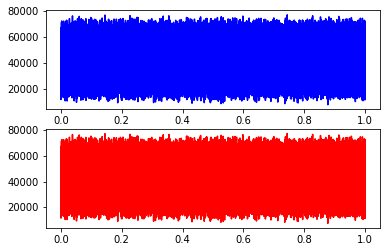

In [20]:
import matplotlib.pyplot as plt
x=np.linspace(0,1,100000)
plt.subplot(2,1,1)
plt.plot(x, y_test, color='blue')
plt.subplot(2,1,2)
plt.plot(x, y_pred, color='red');

In [21]:
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:',mae)
mse=metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error:',mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',rmse)  

Mean Absolute Error: 6.206049874890595e-11
Mean Squared Error: 5.7160864363065826e-21
Root Mean Squared Error: 7.560480432027175e-11
